# 1. Kalman Filter applied to 1D Movement with constant velocity

In [1]:
# allow use of python3 syntax
from __future__ import division, print_function, absolute_import
import  numpy as np
# local script with often used 
import kalman as k

In [2]:
# contents of local file kalman.py
# %load kalman.py

import numpy as np
import matplotlib.pyplot as plt



def kalman_predict( A, # transition matrix 
            r, # measurement error matrix
            H, # transformation matrix from state vector to measurement
            p, # initial variance on prediction
            xkal, # estimated state vector
            xpredict, # predicted state vector
            xmeas): # measurements
    for i in range(1, xkal.shape[0]): # for each measurement do 
        # prediction: recursive formula
        xpredict[:, i] = np.dot(A, xkal[:, i - 1])
        # predict covariance  
        p = np.dot(np.dot(A, p), A.T)
        # construct kalman gain matrix according to prediction equations
        # higher gain leads to higher influence of measurement,
        # lower gain to higher influence of predicion
        K = np.dot(np.dot(p, H.T), np.linalg.inv(np.dot(np.dot(H, p), H.T) + r))
        # construct estimate from prediction and gain 
        xkal[:, i] = xpredict3[:, i] + np.dot(K, (xmeas[:, i] - H*xpredict[:, i]))
        # update covariance with gain
        p = np.dot(np.identity(K.shape[0]) - K, p)
    return xkal, xpredict

def plot_results(xkal, xpredict, xmeas, xtrue):
    fig1 = plt.figure()
    ax1 = plt.axes()
    plt.plot(xtrue, 'b-', label = 'True')
    plt.plot(xmeas[0].T, 'rx', label = 'Measuement')
    plt.plot(xpredict[0].T, 'g.',  label = 'Prediction')
    plt.plot(xkal[0].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('X')

    fig2 = plt.figure()
    ax2 = plt.axes()
    plt.axhline(v)
    plt.axhline(np.mean(xmeas[1]))
    plt.plot(xpredict[1].T, 'g.',  label = 'Prediction')
    plt.plot(xmeas[1].T, 'rx', label = 'Measurement')
    plt.plot(xkal[1].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('Velocity')
    return [[fig1, fig2], [ax1, ax2]]


### Parameters

The system under consideration is an object traveling under constant velocity.
Its motion (in both time and space) can be parametrized as a straight line with
intercept $x_0$ and inclination $v$. The position is measured $N$ times at time
intervals $dt$, or alternatively at some fixed positions given by $k$ surfaces.

In [3]:
# number of measurements
N = 10
# time step
dt = 1.
# final time
T = N * dt
# velocity
v = -10.

### True trajectory

In [4]:
# initial position
x0 = 100.
# elementwise add offset x0 to array of positions at different times
xtrue = x0 + v *  np.linspace(0, T, N)
print(xtrue)

[ 100.           88.88888889   77.77777778   66.66666667   55.55555556   44.44444444   33.33333333   22.22222222   11.11111111    0.        ]


The measurement is noisy and the results are normally distributed with variance
$\sigma^2$.


### Measured trajectory

In [5]:
sigma = 10
noise = np.random.normal(loc=0, scale=sigma, size=xtrue.shape)
xmeas = xtrue + noise
print(xmeas)

[ 98.99988197  82.47115689  68.76784557  73.61613659  64.74525529  44.36931938  48.29768791  33.66360865  25.0066064   -0.85944839]


## Kalman Filter

### System equation
In this simplest case the state vector $\mathbf{p}_k = [x_0, v]$ at surface $k$
is left unchanged by the time evolution of the system. An alternative
parametrization is given by the  The deterministic function $\mathbf{f}_k$
(which has a linear approximation $\mathbf{F}_k$ that describes how the track
parameter would change from one surface to another is just the identity.
Additionaly, future track parameters are affected by process noise
$\mathbf{\delta}_k$. Usually only a subset of the track parameters are affected
by process noise. This is expressed by multiplying the matrix representation of
process noise with a projection matrix $\mathbf{P}_k$.
The covariance matrix of $\mathbf{\delta}_k$ is denoted $\mathbf{Q}_k$.



### Measurement equation

The deterministic function $\mathbf{h}_k$  with linear expansion $\mathbf{H}_k$
maps the track parameters $\mathbf{p}_k$ to measurable quantities (p.ex. space
time points). The covariance of the measurement noise is denoted $\mathbf{V}_k$


Noattion:
[1] Frühwirth, Rudolf, and Meinhard Regler. _Data analysis techniques for high-
energy physics_. Vol. 11. Cambridge University Press, 2000.

In [6]:
# estimated track parameters at times k
xkal = np.zeros(xmeas.shape)
# prediction for new track parameters based on previous ones
xpredict = np.zeros(xmeas.shape)
# covariance matrices (here only numbers) of the measurements
p = np.zeros(xmeas.shape)
# Kalman gain matrices
K = np.zeros(xmeas.shape)
# initial position
xpredict[0] = xkal[0] = xmeas[0]
# initial variance on prediction
p[0] = 20
# measurement error
r = sigma**2

# transformation matrix (from state to measurement)
H = 1

for i in range(1, N):
    # prediction: recursive formula
    xpredict[i] = xkal[i - 1] + v * dt
    p[i] = p[i - 1]
    # constructing Kalman gain matrix
    # in this case, the gain shrinks with each recursion
    # makes sense, as one outlier should not influence a prediction based on many points
    K[i] = p[i] / (p[i] + r)
    # final estimate of local track paramters based on prediction and 
    # measurement
    xkal[i] = xpredict[i] + K[i] * (xmeas[i] - H * xpredict[i])
    # update covariance
    p[i] = (1 - K[i]) * p[i]


### Plot results

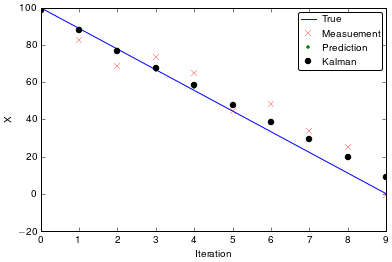

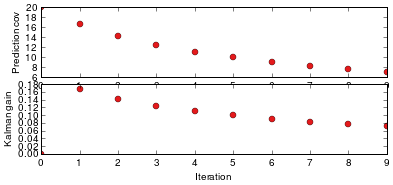

In [7]:
%matplotlib inline
import matplotlib.pyplot as plot
plot.plot(xtrue, 'b-', label = 'True')
plot.plot(xmeas, 'rx', label = 'Measuement')
plot.plot(xpredict, 'g.',  label = 'Prediction')
plot.plot(xkal, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('X')
plot.legend()
plot.show()
plot.subplot(3,1,1)
plot.plot(p,'o')
plot.ylabel('Prediction cov')
plot.subplot(3,1,2)
plot.plot(K,'o')
plot.ylabel('Kalman gain')
plot.xlabel('Iteration')
plot.show()


# 2. Same problem but with unknown velocity

In [9]:
xpredict2 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
xkal2 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
# initial position and velocity
xpredict2[:,0] = xkal2[:,0] = np.array ( [[xmeas[0]], [np.random.normal(v,1.5) ] ])
# initial variance on prediction
p2 = np.matrix ( [[20, 0],
                    [0, 20]] )
# measurement error
r = np.matrix([[sigma^2]])

# prediction matrix
A = np.matrix ( [[1, dt],
                 [0, 1]] )
# transformation matrix (from measurement to state vector)
H = np.matrix ( [[1 , 0]] )

for i in range(1,N):
    # prediction: recursive formula
    xpredict2[:,i] = np.dot(A, xkal2[:,i-1] )
    p2 = A*p2*A.T
    K2 = np.dot(p2*H.T, np.linalg.inv(H*p2*H.T+r))
    xkal2[:,i] = xpredict2[:,i] + K2*(xmeas[i] - H*xpredict2[:,i])
    p2 = (np.identity(2)-K2) * p2

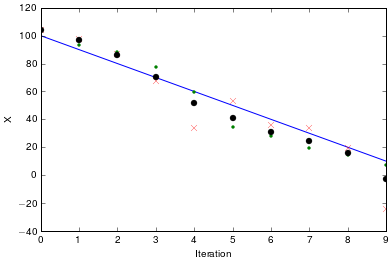

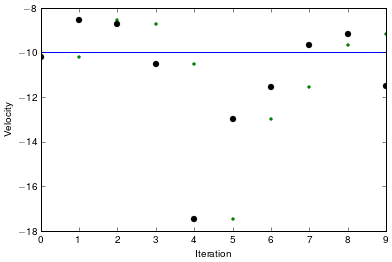

In [10]:
plot.plot(xtrue, 'b-', label = 'True')
plot.plot(xmeas, 'rx', label = 'Measuement')
plot.plot(xpredict2[0].T, 'g.',  label = 'Prediction')
plot.plot(xkal2[0].T, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('X')
plot.show()

plot.axhline(v)
plot.plot(xpredict2[1].T, 'g.',  label = 'Prediction')
plot.plot(xkal2[1].T, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('Velocity')
plot.show()

# 3. Same problem but with unknown velocity that is also measured

#### In principle should be better than 2. - why isn't ?? Additional measurement
(on x_velocity) should improve kalman\

But kalman already knows about the velocity from the transformation matrix A /
the initial value we give to xkal and xpredict?

In [11]:
xmeas3 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
sigma3 = 1
for i in range(0,N):
    xmeas3[0,i] = np.random.normal(xtrue[i], sigma)
    xmeas3[1,i] = np.random.normal(v, sigma3)
print(xmeas3.T)

[[ 101.6068189    -8.62422687]
 [  64.70558286   -9.09470831]
 [  82.97479997   -8.55224501]
 [  75.81386883  -10.62336841]
 [  64.06735211   -9.72975014]
 [  50.86595147   -9.90467817]
 [  40.47985454  -10.34350299]
 [  22.92043731   -8.55127939]
 [  28.56161561  -10.89013509]
 [  10.57449788  -11.62197417]]


In [12]:
xpredict3 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
xkal3 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
# initial position
xpredict3[:,0] = xkal3[:,0] = np.array ( [[xmeas3[0,0]], [xmeas3[1,0]] ] )
# initial variance on prediction
p2 = np.matrix ( [[20, 0],
                    [0, 20]] )
# measurement error
r3 = np.matrix([[0.001*sigma*sigma, 0],
                 [0  , 0.001*sigma3*sigma3]])

# prediction matrix
A = np.matrix ( [[1, dt],
                    [0, 1]] )
# transformation matrix (from measurement to state vector)
H3 = np.matrix ( [[1 , 0],
                   [0, 1]] )

xkal3, xpredict3 = k.kalman_predict(A, r3, H3, p2, xkal3, xpredict3, xmeas3)


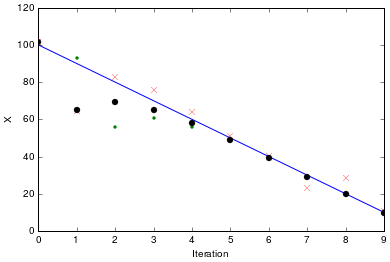

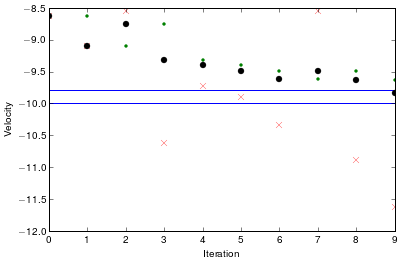

In [13]:
figs = plot_results(xkal3, xpredict3, xmeas3, xtrue)
plt.show()